# If time step ∆t = 0.5, 0.1, 0.01, 0.05.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define control inputs
def control_input(t):
    wl = np.where((t >= 4) & (t <= 6), 12, np.where((t >= 6) & (t <= 8), 12, 1))
    wr = np.where(((t >= 0.5) & (t <= 1.5)) | ((t >= 2) & (t <= 4)), 12, 1)
    return wl, wr

In [ ]:
# Define differential equations
def f(x, y, theta, wl, wr):
    r = 0.1
    L = 1

    v = (wl + wr) * r / 2
    w = (wr - wl) * r / L

    x_dot = v * np.cos(theta)
    y_dot = v * np.sin(theta)
    theta_dot = w
    return x_dot, y_dot, theta_dot

In [ ]:
# Simulation parameters
dt_values = [0.5, 0.1, 0.01, 0.05]
T = 10

In [ ]:
# Initial conditions
x = 0
y = 0
theta = 1

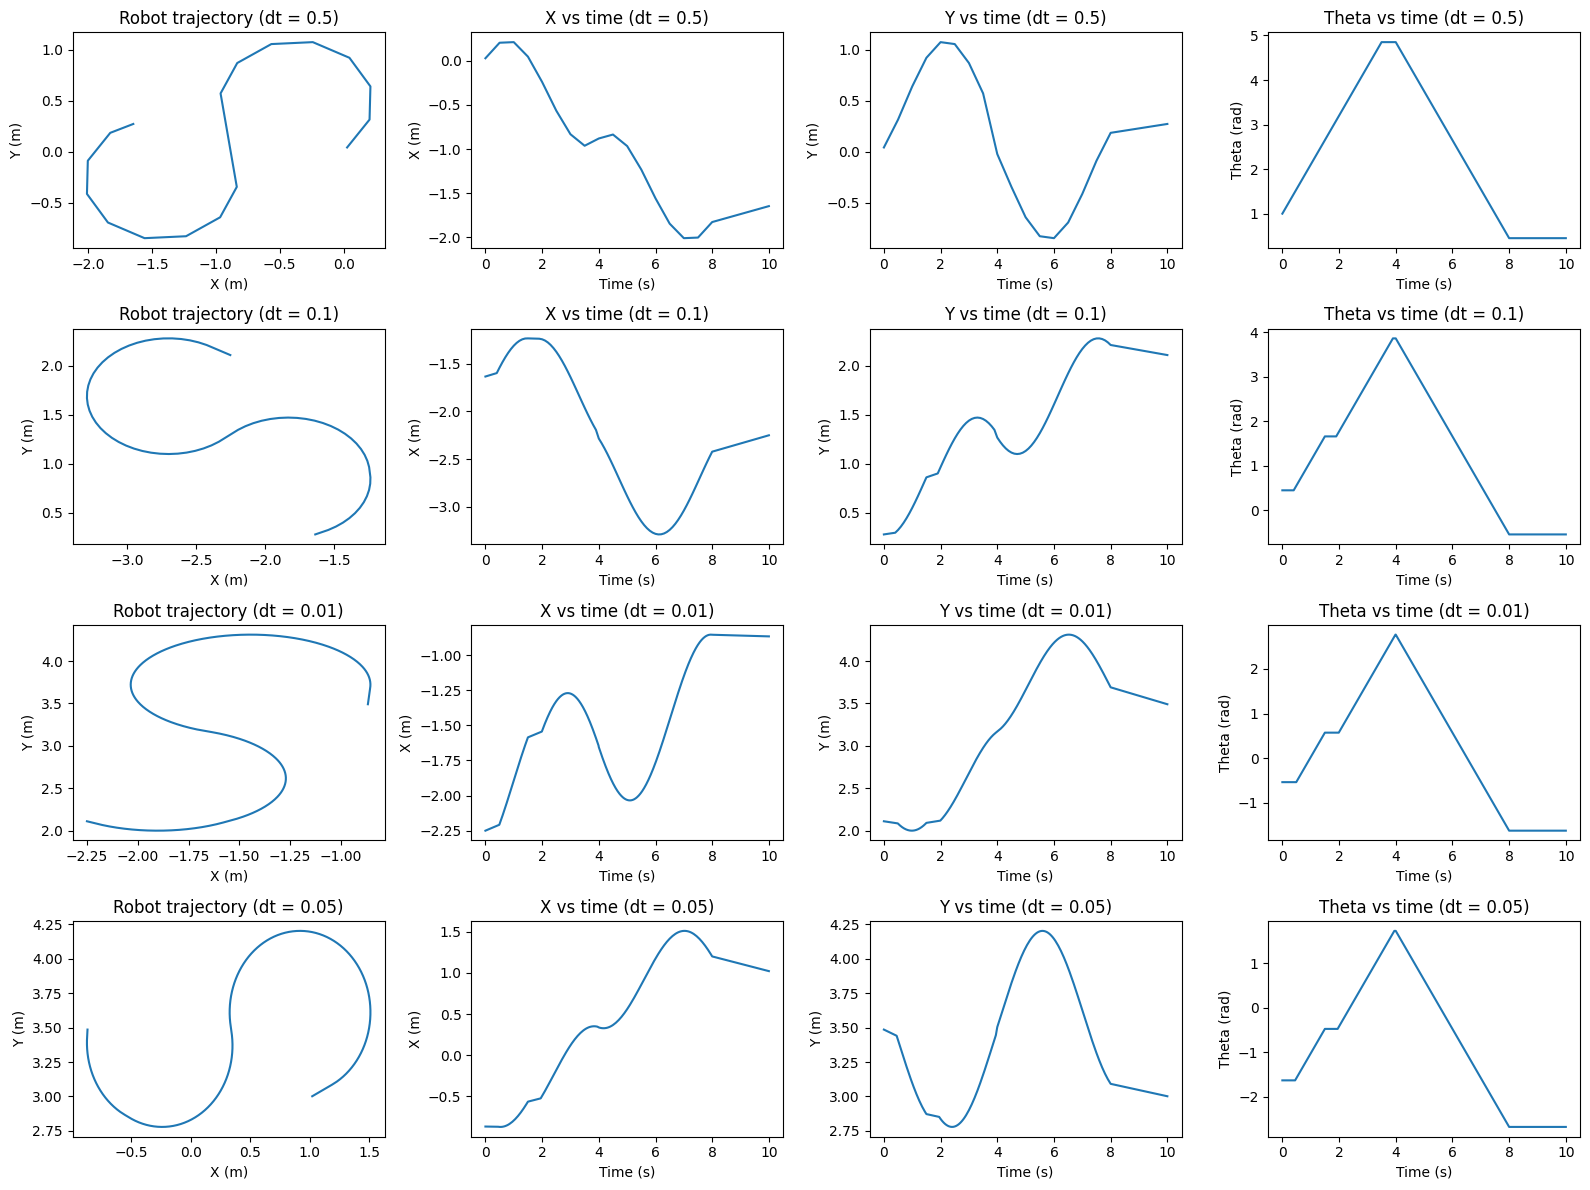

In [ ]:
# Plotting setup
plt.figure(figsize=(16, 12))
plot_idx = 1

for dt in dt_values:
    # Time array
    t_data = np.arange(0, T + dt, dt)

    # Control inputs
    wl, wr = control_input(t_data)

    # Initialize data storage
    x_data = np.zeros(len(t_data))
    y_data = np.zeros(len(t_data))
    theta_data = np.zeros(len(t_data))

    # Euler's method loop
    for i in range(len(t_data)):
        x_dot, y_dot, theta_dot = f(x, y, theta, wl[i], wr[i])
        x += x_dot * dt
        y += y_dot * dt
        theta += theta_dot * dt
        x_data[i] = x
        y_data[i] = y
        theta_data[i] = theta

    # Plotting
    plt.subplot(4, 4, plot_idx)
    plt.plot(x_data, y_data)
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title(f'Robot trajectory (dt = {dt})')

    plt.subplot(4, 4, plot_idx + 1)
    plt.plot(t_data, x_data)
    plt.xlabel('Time (s)')
    plt.ylabel('X (m)')
    plt.title(f'X vs time (dt = {dt})')

    plt.subplot(4, 4, plot_idx + 2)
    plt.plot(t_data, y_data)
    plt.xlabel('Time (s)')
    plt.ylabel('Y (m)')
    plt.title(f'Y vs time (dt = {dt})')

    plt.subplot(4, 4, plot_idx + 3)
    plt.plot(t_data, theta_data)
    plt.xlabel('Time (s)')
    plt.ylabel('Theta (rad)')
    plt.title(f'Theta vs time (dt = {dt})')

    plot_idx += 4

plt.tight_layout()
plt.show()